#### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

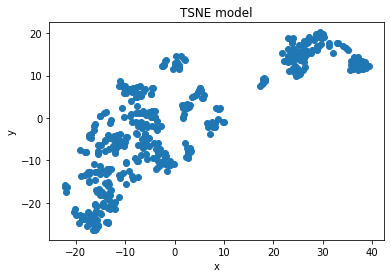

In [25]:
boston = load_boston()

X = pd.DataFrame(boston["data"], columns=boston["feature_names"])
y = pd.DataFrame(boston["target"], columns=["price"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=boston["feature_names"])

X_TSNE = pd.DataFrame(TSNE(n_components=2, learning_rate=250, random_state=42).fit_transform(X_train_scaled), columns=['x', 'y'])

plt.scatter(X_TSNE['x'], X_TSNE['y'])

plt.xlabel('x')
plt.ylabel('y')

plt.title('TSNE model')

plt.show()

#### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [8]:
from sklearn.cluster import KMeans

In [26]:
model = KMeans(n_clusters=3, max_iter=100, random_state=42)
train_labels = model.fit_predict(X_train_scaled)

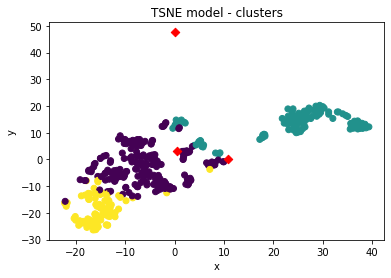

In [27]:
#authors_price.insert(authors_price.shape[1], "cover", ['твердая', 'мягкая', 'мягкая', 'твердая', 'твердая', 'мягкая', 'мягкая'],

centers = scaler.inverse_transform(model.cluster_centers_)

plt.scatter(X_TSNE['x'], X_TSNE['y'], c=train_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')

plt.xlabel('x')
plt.ylabel('y')

plt.title('TSNE model - clusters')

plt.show()

In [29]:
X_train_clustered = X_train.copy()
X_train_clustered.insert(X_train.shape[1], "cluster", train_labels)
X_train_clustered.insert(X_train.shape[1], "price", y_train['price'])

X_train_clustered.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,cluster
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91,12.0,1
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47,19.9,0
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83,19.4,2
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29,13.4,1
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28,18.2,0


In [33]:
i = 0
tmp_dict = {
    "cluster" : [],
    "mean_price" : [],
    "mean_CRIM" : [],
}

while i <= 2:
    cluster = X_train_clustered[X_train_clustered["cluster"]==i]
    tmp_dict["cluster"].append(i)
    means = cluster.mean()
    tmp_dict["mean_price"].append(means["price"])
    tmp_dict["mean_CRIM"].append(means["CRIM"])
    i+=1
    
tmp_means = pd.DataFrame(tmp_dict)
tmp_means

,cluster,mean_price,mean_CRIM
0,0,24.958115,0.421660
1,1,16.165354,10.797028
2,2,27.788372,0.073566


#### *Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [34]:
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=boston["feature_names"])

predict_labels = model.predict(X_test_scaled)

In [35]:
predict_labels

array([0, 2, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1, 2, 2,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0, 2, 2,
       0, 1, 0, 2, 1, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 0, 2, 0,
       1, 2, 2, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 2, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 2, 1, 0, 1, 1, 1, 1, 0, 0])

In [36]:
X_test_clustered = X_test.copy()
X_test_clustered.insert(X_test.shape[1], "cluster", predict_labels)
X_test_clustered.insert(X_test.shape[1], "price", y_test['price'])

X_test_clustered.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,cluster
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04,23.6,0
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53,32.4,2
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07,13.6,1
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52,22.8,2
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27,16.1,1


In [37]:
i = 0
tmp_dict = {
    "cluster" : [],
    "mean_price" : [],
    "mean_CRIM" : [],
}

while i <= 2:
    cluster = X_test_clustered[X_test_clustered["cluster"]==i]
    tmp_dict["cluster"].append(i)
    means = cluster.mean()
    tmp_dict["mean_price"].append(means["price"])
    tmp_dict["mean_CRIM"].append(means["CRIM"])
    i+=1
    
tmp_means = pd.DataFrame(tmp_dict)
tmp_means

,cluster,mean_price,mean_CRIM
0,0,22.031111,0.284583
1,1,16.437143,10.165531
2,2,28.413636,0.079852
